<a href="https://colab.research.google.com/github/grafter-ca/pythone_AL_ML/blob/main/Visualizing_ML_Model_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load and clean dataset
df = pd.read_csv('/content/crop_health.csv')
df['Soil_Moisture'] = df['Soil_Moisture'].fillna(df['Soil_Moisture'].mean())
df['NDVI'] = df['NDVI'].fillna(df['NDVI'].mean())
df['NDVI'] = df['NDVI'].clip(lower=-1, upper=1)
df['Health'] = df['Health'].map({'healthy': 1, 'unhealthy': 0})

# Split features and labels
X = df[['NDVI', 'Soil_Moisture']].values
y = df['Health'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)


# Creating a Confusion Matrix

Confusion Matrix:
 [[138   2]
 [  4  56]]


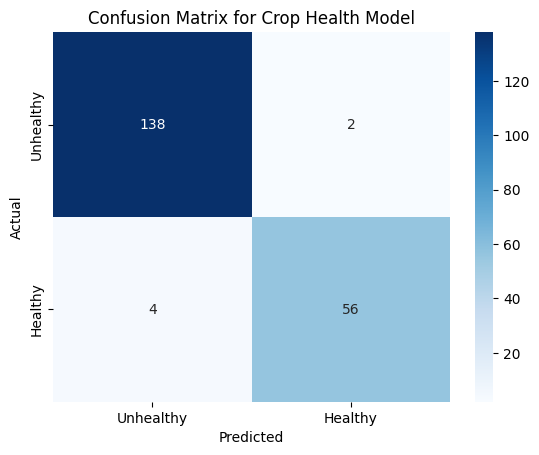

In [2]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Plot with seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Unhealthy', 'Healthy'],
            yticklabels=['Unhealthy', 'Healthy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Crop Health Model')
plt.show()


# Plotting an ROC Curve

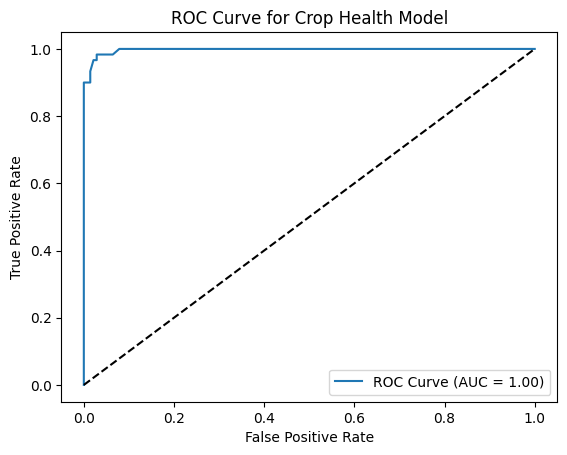

In [3]:
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Crop Health Model')
plt.legend(loc='lower right')
plt.show()
